<a href="https://colab.research.google.com/github/a-nagar/cs4372/blob/main/Python_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_netflix = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/netflix_titles.csv")
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Let's find number of null entries in each column

In [ ]:
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df_netflix['description']

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object

In [ ]:
df_netflix.shape

(8807, 12)

In [ ]:
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# number of rows missing in each column
df_netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

# Handling null values
Strategy 1: Dropping rows/columns containing nulls

In [ ]:
# Remove a column or row with .drop, .dropna or .isnull

# drop column
df_netflix.drop('director', axis=1) 
# drop row
no_director = df_netflix[df_netflix['director'].isnull()].index # get index of rows with missing director
temp = df_netflix.drop(no_director, axis=0)

In [ ]:
temp.shape

(6173, 12)

Strategy 2: Replacing with mean/mode

In [ ]:
# Replace it by the mean, median (numeric data) or mode (categorical data)
df_netflix[df_netflix['rating'].isnull()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
# Replace it by the mean, median (numeric data) or mode (categorical data)
df_netflix[df_netflix['rating'].isnull()]
mode = ''.join(df_netflix['rating'].mode())
df_netflix['rating'].fillna(mode, inplace=True)

In [ ]:
mode

'TV-MA'

Strategy 3: Replacing with a value / number

In [ ]:
# Replace it by an arbitrary number with .fillna()
df_netflix['duration'].fillna('0', inplace=True)

In [ ]:
df_netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

# Identifying Outliers in Data

In [ ]:
df_movie = df_netflix[df_netflix['type']=='Movie']
df_movie['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [ ]:
# selecting only movies
df_movie = df_netflix[df_netflix['type']=='Movie']

# Split Strings by Characters with the str.split Method
df_movie = df_movie.assign(minute = df_movie['duration'].str.split(expand=True)[0].astype(int))


In [ ]:
df_movie['minute']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: minute, Length: 6131, dtype: int64

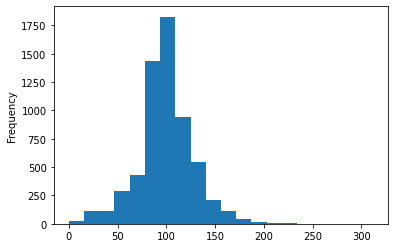

In [ ]:
# make histogram with pandas
ax = df_movie['minute'].plot(kind='hist', bins=20)

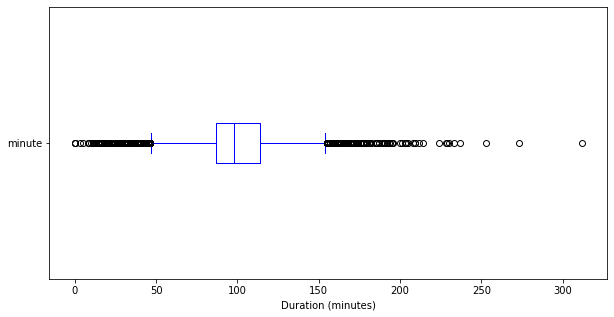

In [ ]:
# make a boxplot with pandas
# outliers are those which are 1.5 * (Inter-Quartile Range) away from the 25 or 75 percentil
df_movie['minute'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('Duration (minutes)')
plt.show()

In [ ]:
df_movie['minute'].describe()

count    6131.000000
mean       99.528462
std        28.369284
min         0.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: minute, dtype: float64

In [ ]:
df_movie['minute']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: minute, Length: 6131, dtype: int64

In [ ]:
# Dealing with Outliers
df_movie[(df_movie['minute']<46.5) | (df_movie['minute']>154.5)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,45
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,191
8770,s8771,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,"March 1, 2018",2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies",Two young lovers set out to overcome the obsta...,171
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art...",157


# Plotting and Visualizing Data

Plotting data helps get insight into data distribution and helps assess correlations. Several libraries available in Python, such as Matplotlib and Seaborn.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


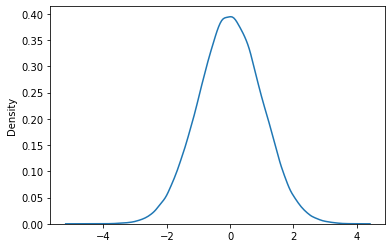

In [ ]:
sns.distplot(np.random.normal(size=100000), hist=False)

### Let's look at the penguins dataset

In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Histogram Plot

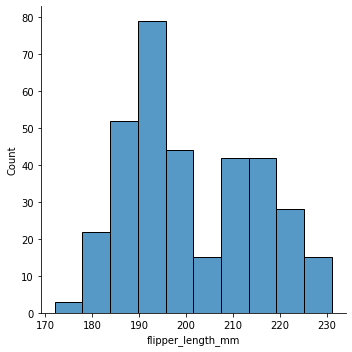

In [ ]:
sns.displot(penguins, x="flipper_length_mm")

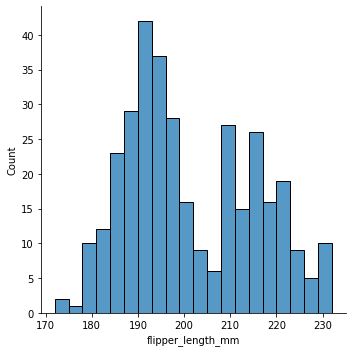

In [ ]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

Changing hue of the plot based on categorical variables

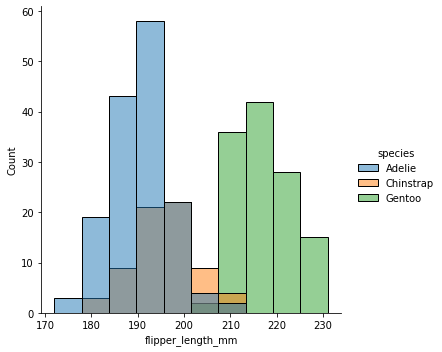

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

Distributing categories across columns

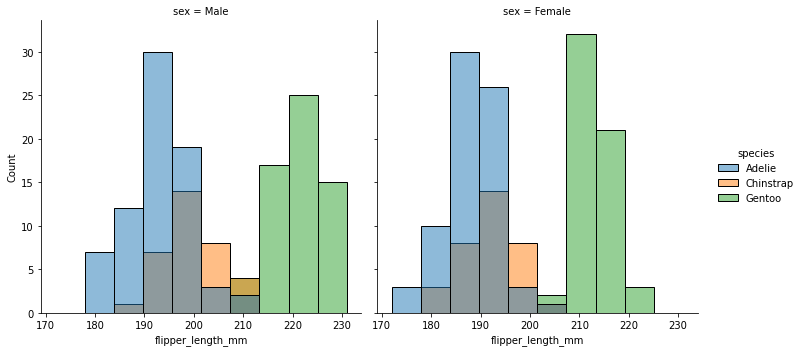

In [ ]:
sns.displot(penguins, x="flipper_length_mm", col="sex", hue="species")

Kernel Density 

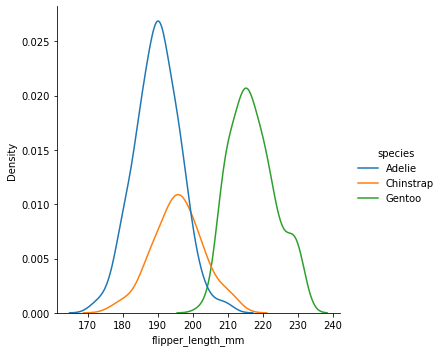

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

Jointplot of two variables

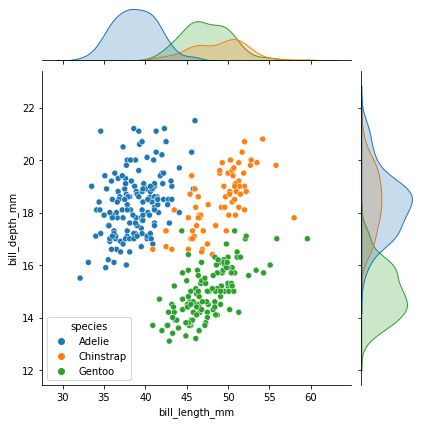

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue = "species")

Pair plot can give histograms as well as joint plots

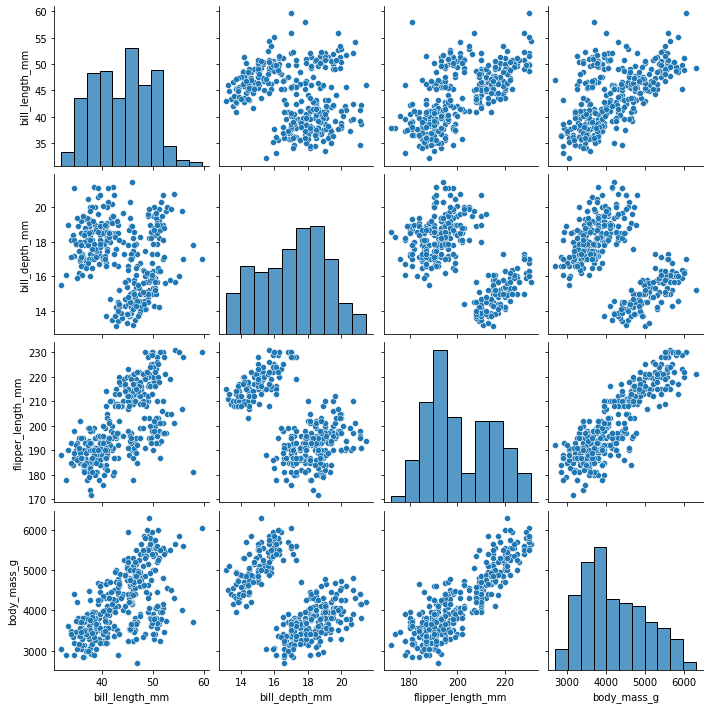

In [ ]:
sns.pairplot(penguins)

Color coded scatterplot based on categorical variables.

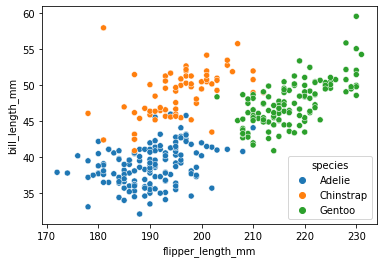

In [ ]:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

Can also do pair-plots with hue being the class label

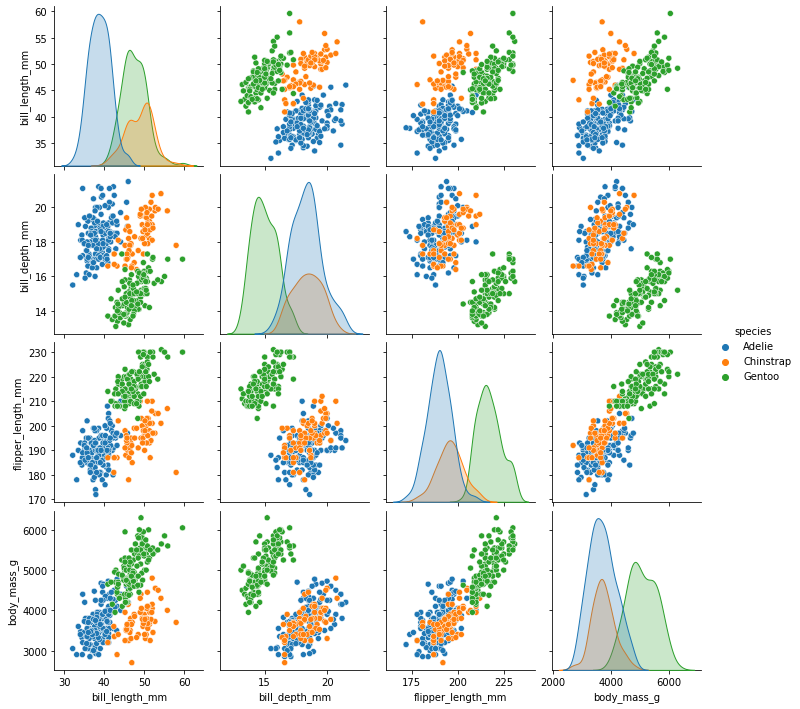

In [ ]:
sns.pairplot(data=penguins, hue="species")

## Other examples of data distribution plots

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


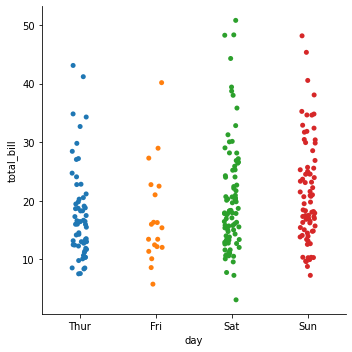

In [ ]:
# categorical scatterplots
sns.catplot(x="day", y="total_bill", data=tips)

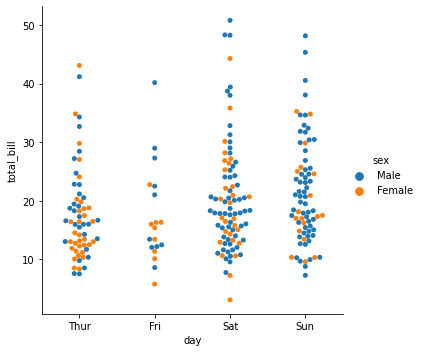

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

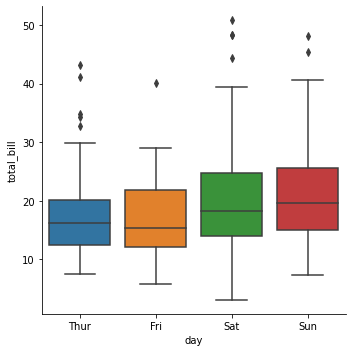

In [ ]:
# Boxplots
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

Analyzing data for statistical relationships. 

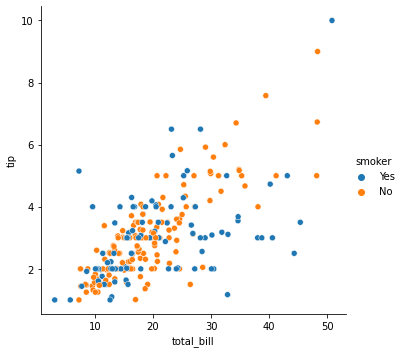

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

Using size and hue parameters

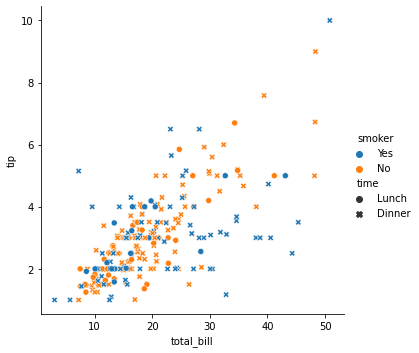

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

Facet plots are subplots representing different categorical variables

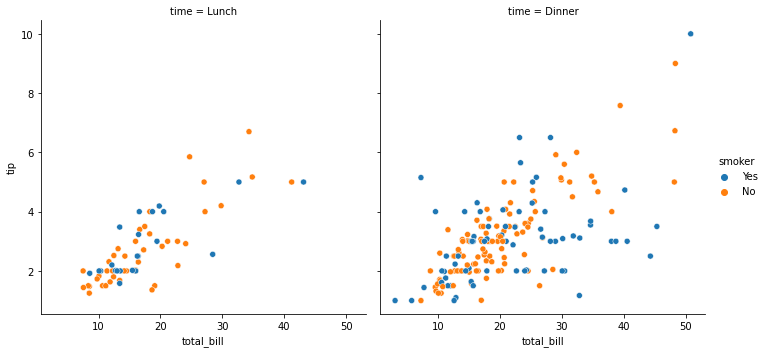

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

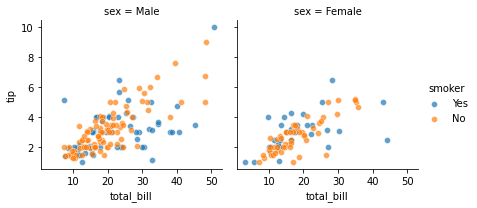

In [ ]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

## Regression Plots

Regplot plots a regression line and a 95% confidence interval for that regression model.

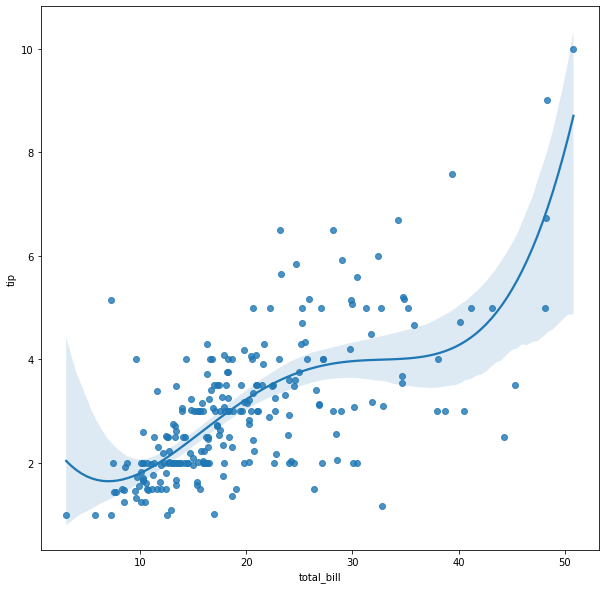

In [ ]:
plt.figure(figsize=(10, 10))
sns.regplot(x="total_bill", y="tip", data=tips, order = 4);

Conditioning on other variables

Note that lmplot has more options and choices than regplot.

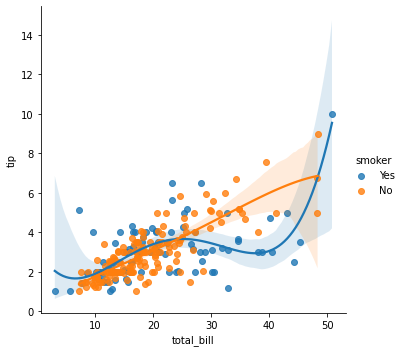

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, order = 4);

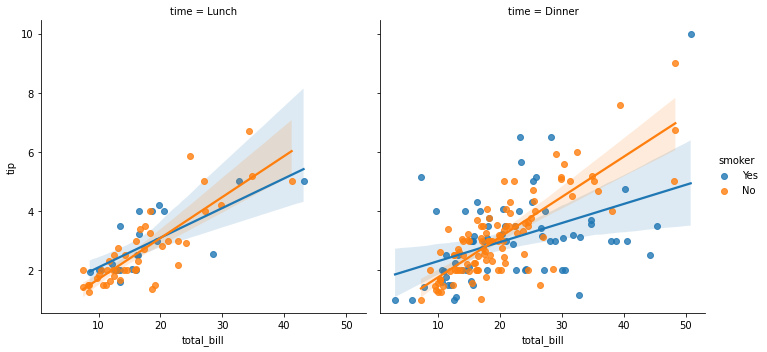

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

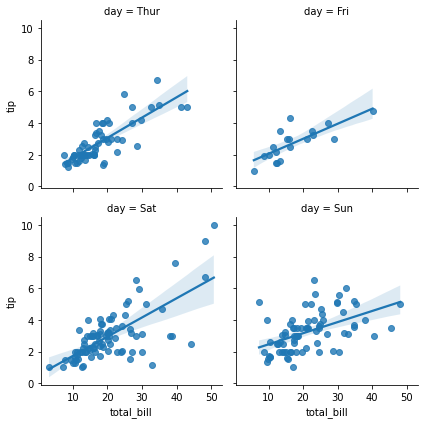

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3);

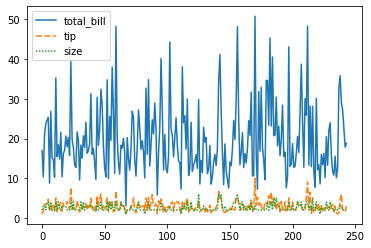

In [ ]:
sns.lineplot(data=tips)

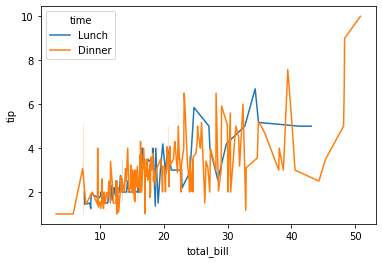

In [ ]:
sns.lineplot(data=tips, x="total_bill", y="tip", hue="time")